# Task 3 - Exploratory Data Analysis - Sample Superstore
##  - Alankrita Rawat

### *This task is part of an internship with The Sparks Foundation.* 
#### *The steps involved in this task will be as follows:*

#### *1. Find out the number of rows and columns and column names.*
#### *2. Check if any value is missing.*
#### *3. Find the duplicate entries and drop them from the dataset.*
#### *4. Get the basic dimensions of the data like mean, max values, etc. *
#### *5. Perform Data Analysis by plotting various charts.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring and Understanding the data

In [ ]:
# Import the file

df = pd.read_csv("SampleSuperstore.csv")

In [ ]:
# Find out some details about the dataset.

print(df.shape)
df.info()

In [ ]:
# The above dataset has 9994 rows and 13 columns.
pd.set_option('display.max_rows',30)
pd.set_option('display.max_columns',15)
df

In [ ]:
# Find out if there is any missing value

df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
# Drop the entries which are getting repeated

df.drop_duplicates(inplace=True)

# Now check again if there are any duplicates

df.duplicated().sum()

In [ ]:
print(df.shape)

# Find out the basic decription of data

df.describe()

### Data Analysis

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [106]:
sales = df['Sales']
profit = df['Profit']
quant = df['Quantity']
disc = df['Discount']

## Quantity, Discount, Sales and Profit - Mean and Max (State-wise)


In [114]:
# Find out the mean quantity sold ,discount, sales and profit from various states.

meanstate = df.groupby("State")[["Quantity","Discount","Sales","Profit"]].mean()
meanstate

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,4.196721,0.000000,319.846557,94.865989
Arizona,3.848214,0.303571,157.508933,-15.303235
Arkansas,4.000000,0.000000,194.635500,66.811452
California,3.832164,0.072946,229.246629,38.241878
Colorado,3.807692,0.316484,176.418231,-35.867351
...,...,...,...,...
Virginia,3.986607,0.000000,315.342500,83.026564
Washington,3.727092,0.064542,276.017550,66.470593
West Virginia,4.500000,0.075000,302.456000,46.480400


In [115]:
# Find out the max quantity sold ,discount, sales and profit from various states.

maxstate = df.groupby("State")[["Quantity","Discount","Sales","Profit"]].max()
maxstate

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,14,0.0,3040.000,1459.2000
Arizona,14,0.7,1879.960,211.4955
Arkansas,9,0.0,1793.980,843.1706
California,14,0.2,8187.650,1906.4850
Colorado,13,0.7,2549.985,247.9960
...,...,...,...,...
Virginia,14,0.0,8749.950,2799.9840
Washington,14,0.2,13999.960,6719.9808
West Virginia,8,0.3,673.344,219.4416


## Correlation between Different Variables

### 1. Correlation between Sales, Profit with respect to Discount

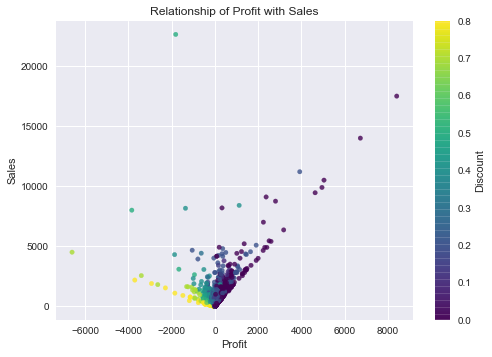

In [116]:
# correlation between sales and Profit with respect to regions. 

plt.style.use('seaborn')

plt.scatter(profit, sales, s=20, c=disc,cmap='viridis', alpha=0.8)
plt.title("Relationship of Profit with Sales")
plt.xlabel("Profit")
plt.ylabel("Sales")

cbar = plt.colorbar()
cbar.set_label('Discount') 

plt.savefig('ProfitSales-Discount.png',dpi=600)

### Conclusion: 
#### Profit and sales are highly correlated. As the sales increased, the profits also increased. 
#### In the graph, the sales below have resulted in both, the profit and the loss. This is so due to a third factor discount. 
#### Ex: Sales of amount x have resulted in loss where Discount offered is more. On the other hand, the same sales amount x has resulted in profit due to less discount offered.

### 2. Correlation between Quantity and Profit with respect to Discount

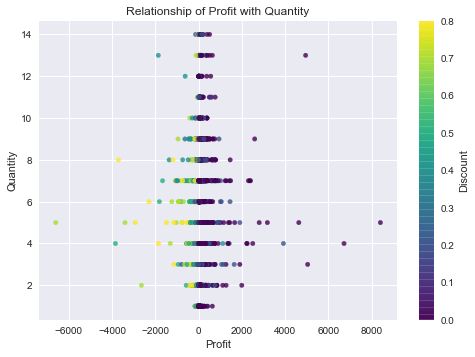

In [117]:
plt.style.use('seaborn')

plt.scatter(profit, quant, s=20, c=disc,cmap='viridis', alpha=0.8)
plt.title("Relationship of Profit with Quantity")
plt.xlabel("Profit")
plt.ylabel("Quantity")

cbar = plt.colorbar()
cbar.set_label('Discount') 

plt.savefig('ProfitQuantity-Discount.png',dpi=600)

### Conclusion: 
#### Quantity and profit are not correlated. 
#### As the quantity sold increases, discount offered reduces. Hence, at higher quantities, losses are less.

### 3. State-wise Sales

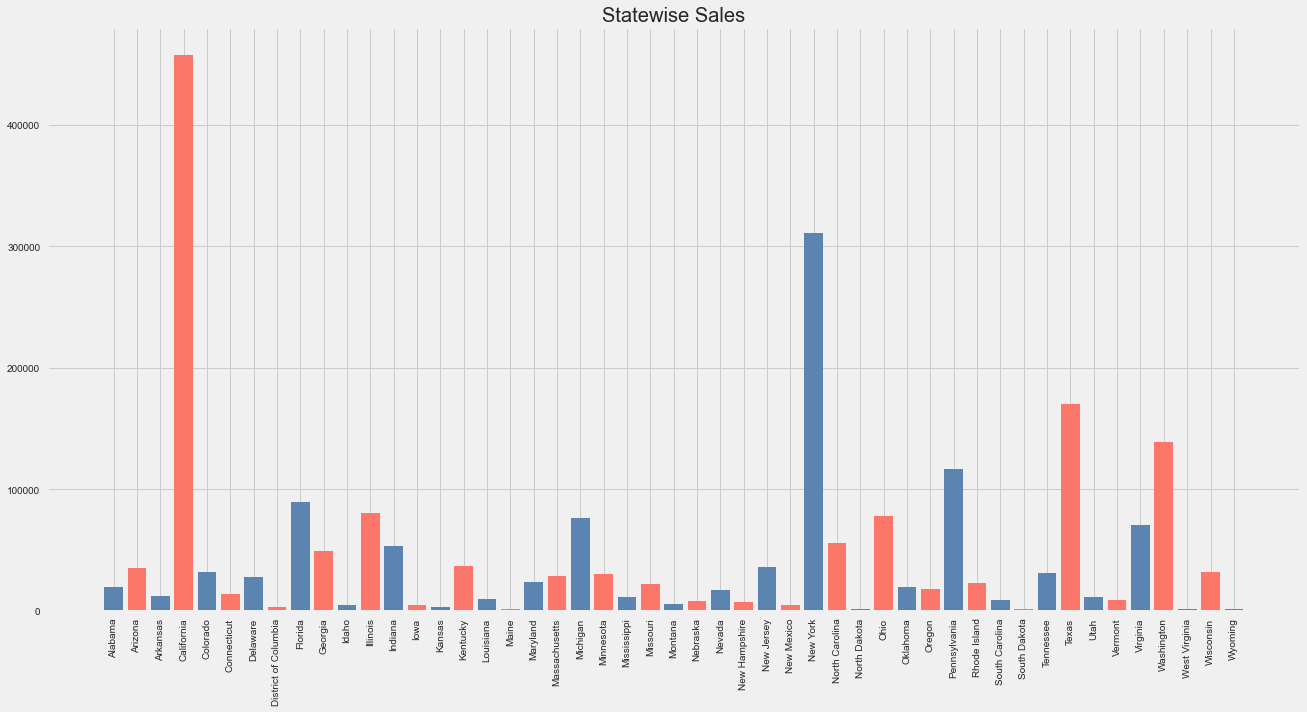

In [185]:
sumstate = df.groupby("State")["Sales"].sum()
sumstate

# Plot the graph for statewise total sales.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

color = ['#5B84B1FF','#FC766AFF']

plt.bar(sumstate.index,sumstate.values,color=color)
plt.xticks(rotation=90)
plt.title("Statewise Sales")

plt.savefig('StatewiseSales.png',dpi=600)

### Conclusion:
#### The highest sales is made in California, followed by New York.

### 4. State-wise Profit

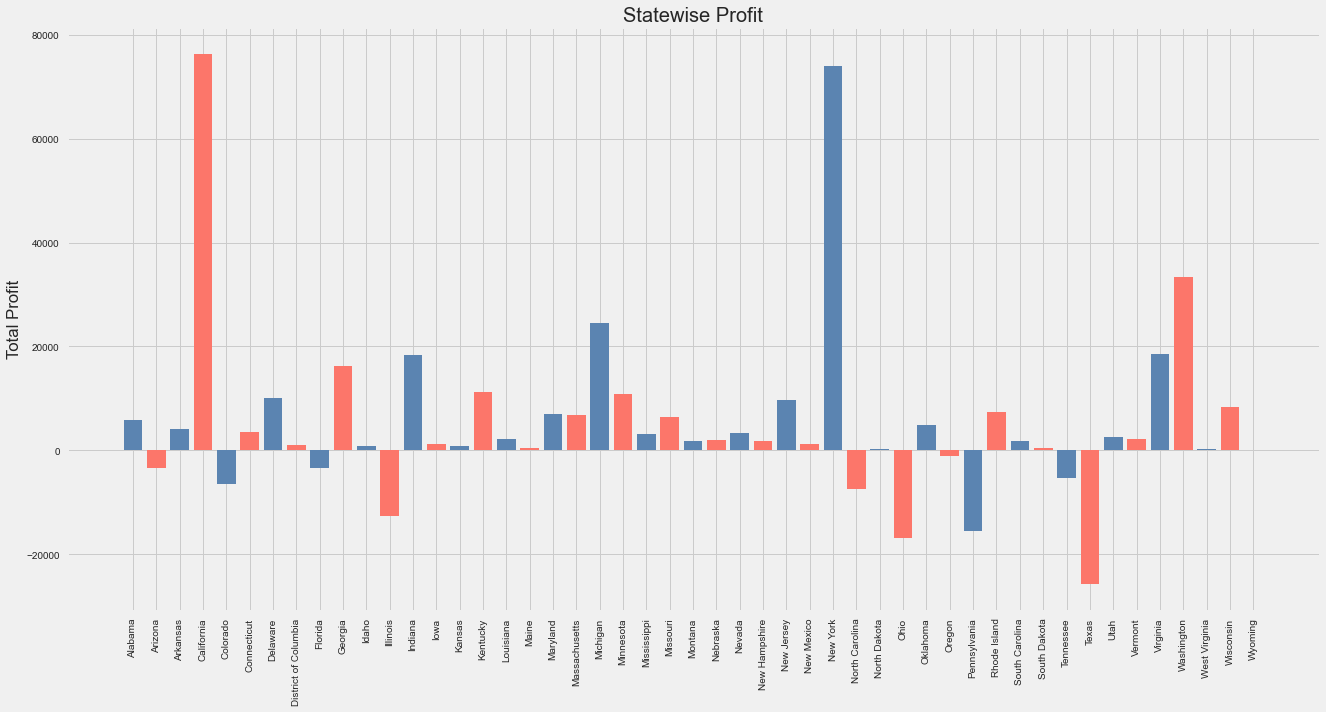

In [184]:
sumstatepft = df.groupby("State")["Profit"].sum()
sumstatepft 

# Plot the graph for Statewise Total Profit.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

color = ['#5B84B1FF','#FC766AFF']

plt.bar(sumstatepft.index,sumstatepft.values,color=color)
plt.xticks(rotation=90)
plt.title("Statewise Profit")
plt.ylabel("Total Profit")

plt.savefig('StatewiseProfit.png',dpi=600)

### Conclusion:
#### The highest proft is from California, followed by New York. 
#### Texas is reporting maximum loss even though it had the third highest sales. This requires immediate action.

### 5. Regional Sales and Profit

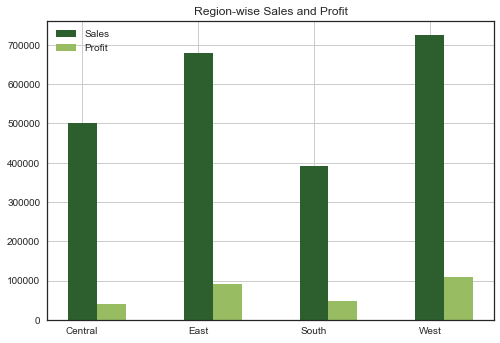

In [131]:
import numpy as np
regsales = df.groupby("Region")["Sales"].sum()
regprofit = df.groupby("Region")["Profit"].sum()
width = 0.25
xvar=np.arange(len(regsales.index))

plt.bar(xvar,regsales.values,color='#2C5F2D',width=width,label='Sales')
plt.bar(xvar+width,regprofit.values,color='#97BC62FF',width=width,label="Profit")
plt.title("Region-wise Sales and Profit")
plt.legend()
plt.grid(True)

plt.xticks(ticks=xvar,labels=regsales.index)
plt.savefig("Regional Sales and Profit.png",dpi=600)

### 6. Category-wise Sales and Profit

([<matplotlib.axis.XTick at 0x1d7886fe970>,
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

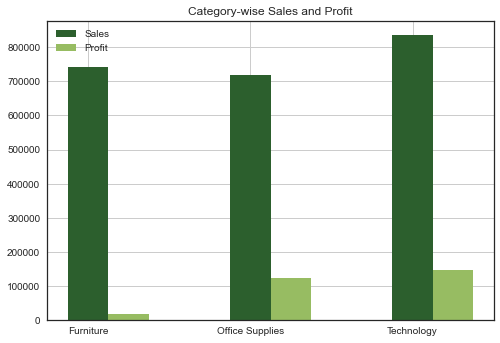

In [132]:
catsales = df.groupby("Category")["Sales"].sum()
catprofit = df.groupby("Category")["Profit"].sum()
width = 0.25
xlab=np.arange(len(catsales.index))

plt.bar(xlab,catsales.values,color='#2C5F2D',width=width,label='Sales')
plt.bar(xlab+width,catprofit.values,color='#97BC62FF',width=width,label="Profit")
plt.title("Category-wise Sales and Profit")
plt.legend()
plt.grid(True)

plt.xticks(ticks=xlab,labels=catsales.index)
plt.savefig('CategwiseProfit.png',dpi=600)

### 7. Sub-Category-wise Sales and Profit


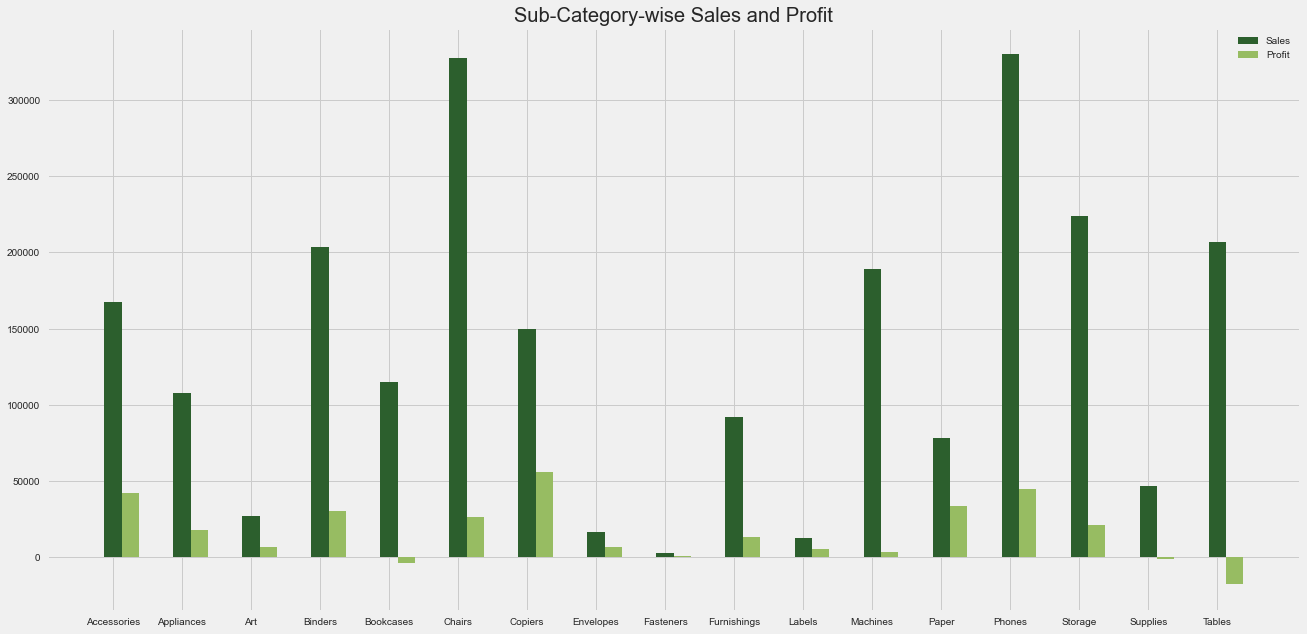

In [183]:
    # Find out the sales and profit for various Sub-Categories.

    subcatsales = df.groupby("Sub-Category")["Sales"].sum()
    subcatprofit = df.groupby("Sub-Category")["Profit"].sum()
    width = 0.25
    xlab=np.arange(len(subcatsales.index))
    plt.figure(figsize=(20,10))
    plt.style.use('fivethirtyeight')

    plt.bar(xlab,subcatsales.values,color='#2C5F2D',width=width,label='Sales')
    plt.bar(xlab+width,subcatprofit.values,color='#97BC62FF',width=width,label="Profit")
    plt.title("Sub-Category-wise Sales and Profit")
    plt.legend()

    plt.xticks(ticks=xlab,labels=subcatsales.index)
    plt.savefig('SubcategwiseProfSales.png',dpi=600)

<ipython-input-192-56b305684f4d>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(subcatprofit.index,subcatprofit.values,Linestyle='--',color='k',marker='o',label="Profit")


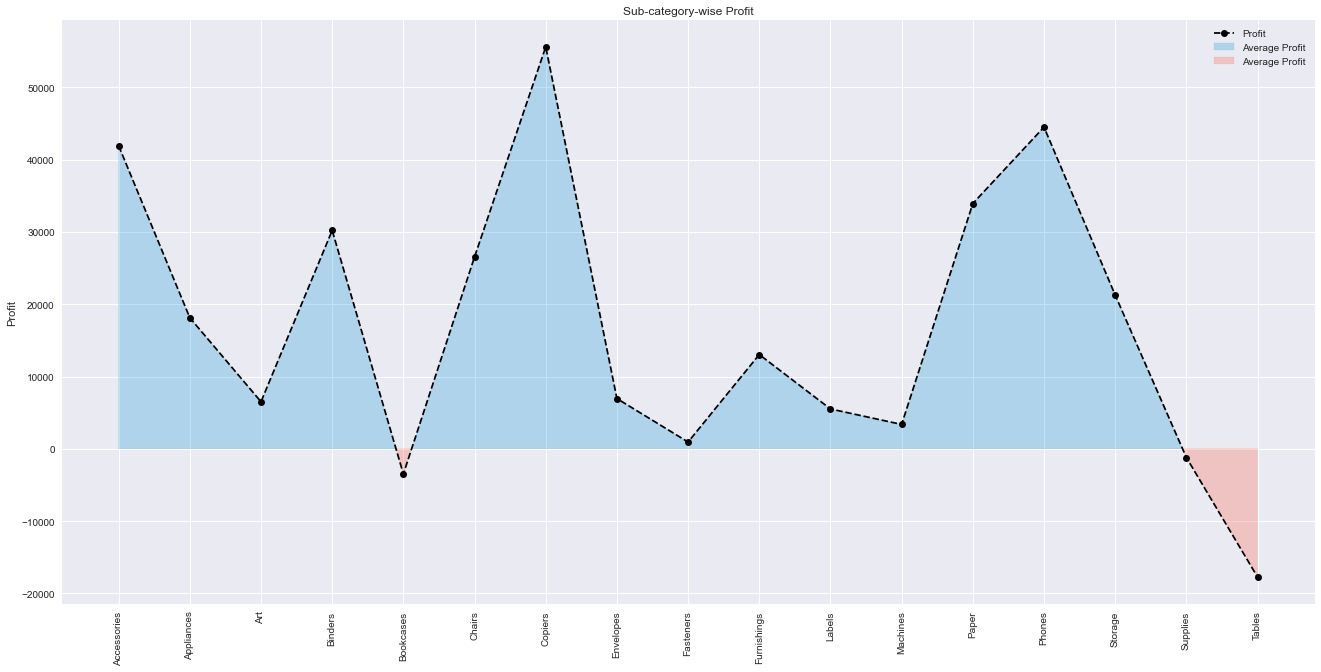

In [192]:
# Plot the graph and find out which subcategories are providing below profits below median profits .

avgprofit = df["Profit"].mean()
medianprofit = df["Profit"].median()

plt.style.use("seaborn")
plt.figure(figsize=(20,10))

plt.plot(subcatprofit.index,subcatprofit.values,Linestyle='--',color='k',marker='o',label="Profit")

plt.fill_between(subcatprofit.index,subcatprofit.values,medianprofit,
                 where = subcatprofit.values>medianprofit,
                 interpolate=True,label="Average Profit",alpha=0.25,color='#008fd5')

plt.fill_between(subcatprofit.index,subcatprofit.values,medianprofit,
                 where = subcatprofit.values<=medianprofit,
                 interpolate=True,label="Average Profit",alpha=0.25,color='#fc4f30')

plt.xticks(rotation=90)
plt.title("Sub-category-wise Profit")
plt.ylabel("Profit")
plt.legend()

plt.savefig('Subcat below medProfit.png',dpi=600)

### 8. Segment-wise Sales and Profit


([<matplotlib.axis.XTick at 0x1d788f34d60>,
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

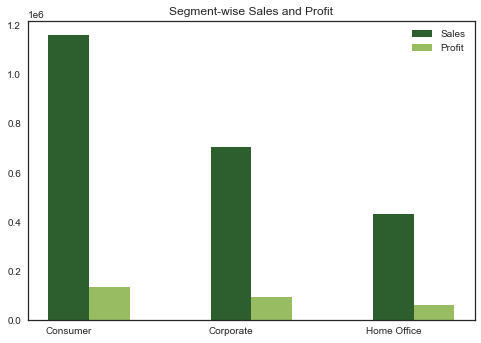

In [135]:
segsales = df.groupby("Segment")["Sales"].sum()
segprofit = df.groupby("Segment")["Profit"].sum()
width = 0.25
xlab=np.arange(len(segsales.index))

plt.bar(xlab,segsales.values,color='#2C5F2D',width=width,label='Sales')
plt.bar(xlab+width,segprofit.values,color='#97BC62FF',width=width,label="Profit")
plt.title("Segment-wise Sales and Profit")
plt.legend()

plt.xticks(ticks=xlab,labels=segsales.index)
plt.savefig('SegwiseProfit.png',dpi=600)

### 9. Subcategory vs Region

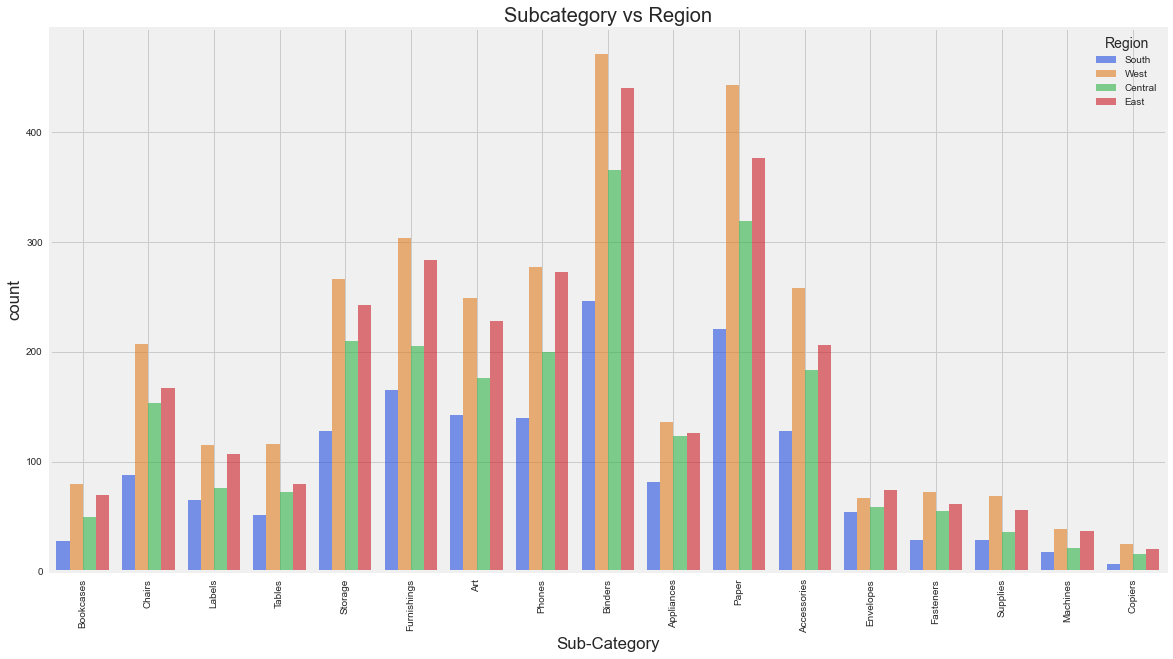

In [182]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
sns.set_palette("bright")

sns.countplot(x="Sub-Category", hue= "Region", data=df,alpha=0.6)
plt.title("Subcategory vs Region")
plt.xticks(rotation="vertical")
plt.grid(True)

plt.savefig('Subcat vs Region.png',dpi=600)

### Thank You!!